In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ecdf
import time

# Generate data

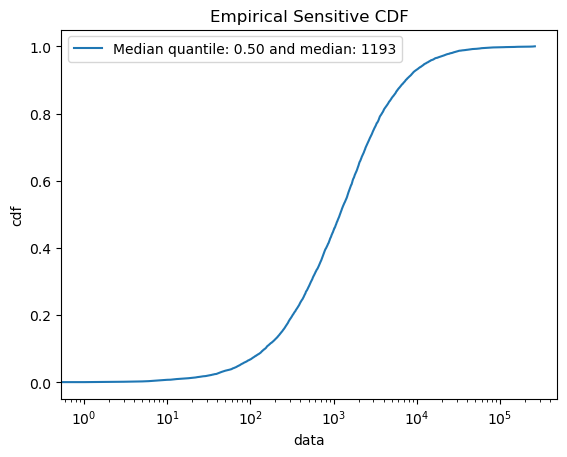

In [3]:
def generate_pareto_data(shape, N, scale=2000):
    D = np.random.pareto(shape, N) * scale
    return D


N = 10000  # number of samples

# generate the data
data = generate_pareto_data(1.5, N)

# discretize the data
num_bins = int(4 ** 9)  # Number of bins
bins = np.array(range(num_bins))  # Bin edges
intervals = np.array([bins[:-1], bins[1:]]).T
data = np.round(data).astype(int)  # integer data
data = np.clip(data, 0, num_bins - 1)

# get the empirical cdf of the coins
cf = ecdf(data)
cf_dict = dict(zip(cf.cdf.quantiles, cf.cdf.probabilities))

# get the median quantile
median = None
for i, j in enumerate(cf_dict.keys()):
    if cf_dict[j] > 0.5:
        median = int(list(cf_dict.keys())[i - 1])
        break
median_quantile = cf_dict[median]

# plot cdf
plt.plot(cf.cdf.quantiles, cf.cdf.probabilities, label=f"Median quantile: {median_quantile:.2f} and median: {median}")
plt.xlabel("data")
plt.xscale("log")
plt.ylabel("cdf")
plt.title("Empirical Sensitive CDF")
plt.legend()
plt.show()

# Mechanism

In [7]:
from naive_noisy_binary_search.mechanism import naive_noisy_binary_search
from naive_noisy_binary_search.utils import get_intervals

intervals = get_intervals(bins)

target = 0.5
eps = 0.5
replacement = False
M = len(data)
alpha = 0.05

start = time.time()
dp_median = naive_noisy_binary_search(data=data,
                                      intervals=intervals,
                                      target=target,
                                      eps=eps,
                                      M=M,
                                      replacement=replacement)
print(f"Time taken: {time.time() - start:.2f} seconds")

Time taken: 0.03 seconds


# Error

In [5]:
dp_median_quantile = None
if dp_median in cf_dict.keys():
    dp_median_quantile = cf_dict[dp_median]
else:
    for quantile in reversed(range(dp_median)):
        if quantile in cf_dict.keys():
            dp_median_quantile = cf_dict[quantile]
            break
error = dp_median_quantile - median_quantile

In [6]:
print("True median:", median)
print("DP median:", dp_median)
print("Error:", error)

True median: 1193
DP median: 1451
Error: 0.052000000000000046
